In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# CONFIGURATION
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
pd.set_option('display.max_columns', None)

In [31]:
df = pd.read_csv("/content/drive/MyDrive/technonext/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [32]:
print(f"Dataset Shape: {df.shape}")
print("\nColumn Data Types:")
print(df.dtypes)

Dataset Shape: (51717, 17)

Column Data Types:
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


In [33]:
# DATA QUALITY ASSESSMENT (Critical First Step)
print("\n\nMISSING VALUES ANALYSIS (%):")
missing = (df.isnull().sum() / len(df)) * 100
print(missing.sort_values(ascending=False))

print("\nDUPLICATES: ", df.duplicated().sum())

# SPECIAL HANDLING FOR TRICKY COLUMNS
# Rename problematic columns for easier access
df.rename(columns={
    'approx_cost(for two people)': 'approx_cost',
    'listed_in(type)': 'meal_type',
    'listed_in(city)': 'city'
}, inplace=True)

# Convert cost to numeric (remove commas) - Ensure it's string first
df['approx_cost'] = df['approx_cost'].astype(str).str.replace(',', '', regex=False)
df['approx_cost'] = pd.to_numeric(df['approx_cost'], errors='coerce')

# Clean 'rate' column: "4.1/5" → 4.1
df['rate'] = df['rate'].replace('NEW', np.nan).replace('-', np.nan)
df['rating'] = df['rate'].str.extract(r'(\d+\.\d+)').astype(float)



MISSING VALUES ANALYSIS (%):
dish_liked                     54.291626
rate                           15.033741
phone                           2.335789
approx_cost(for two people)     0.669026
rest_type                       0.438927
cuisines                        0.087012
location                        0.040606
url                             0.000000
address                         0.000000
votes                           0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

DUPLICATES:  0


In [34]:
# IMPORT CORE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# SILENCE FONT WARNINGS (this is the key fix)
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# CONFIGURATION - SIMPLIFIED AND CROSS-PLATFORM
plt.style.use('seaborn-v0_8-whitegrid') # Corrected style name
sns.set_palette("viridis")
pd.set_option('display.max_columns', None)

# Set figure parameters without font specification
plt.rcParams.update({
    'axes.titleweight': 'bold',
    'axes.titlesize': 16,
    'axes.labelweight': 'semibold',
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 120,
    'figure.figsize': (10, 6)
})

# 1. LOAD & INITIAL ASSESSMENT (unchanged)
df = pd.read_csv('/content/drive/MyDrive/technonext/zomato.csv', encoding='latin-1')

print(f"Dataset Shape: {df.shape}")
print("\nColumn Data Types:")
print(df.dtypes)

# 2. DATA QUALITY ASSESSMENT (unchanged)
print("\n\nMISSING VALUES ANALYSIS (%):")
missing = (df.isnull().sum() / len(df)) * 100
print(missing.sort_values(ascending=False))

print("\nDUPLICATES: ", df.duplicated().sum())

# SPECIAL HANDLING FOR TRICKY COLUMNS (unchanged)
df.rename(columns={
    'approx_cost(for two people)': 'approx_cost',
    'listed_in(type)': 'meal_type',
    'listed_in(city)': 'city'
}, inplace=True)

# Convert cost to numeric (remove commas)
df['approx_cost'] = df['approx_cost'].str.replace(',', '').astype(float)

# Clean 'rate' column: "4.1/5" → 4.1
df['rate'] = df['rate'].replace('NEW', np.nan).replace('-', np.nan)
df['rating'] = df['rate'].str.extract(r'(\d+\.\d+)').astype(float)

Dataset Shape: (51717, 17)

Column Data Types:
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


MISSING VALUES ANALYSIS (%):
dish_liked                     54.291626
rate                           15.033741
phone                           2.335789
approx_cost(for two people)     0.669026
rest_type                       0.438927
cuisines                        0.087012
location        

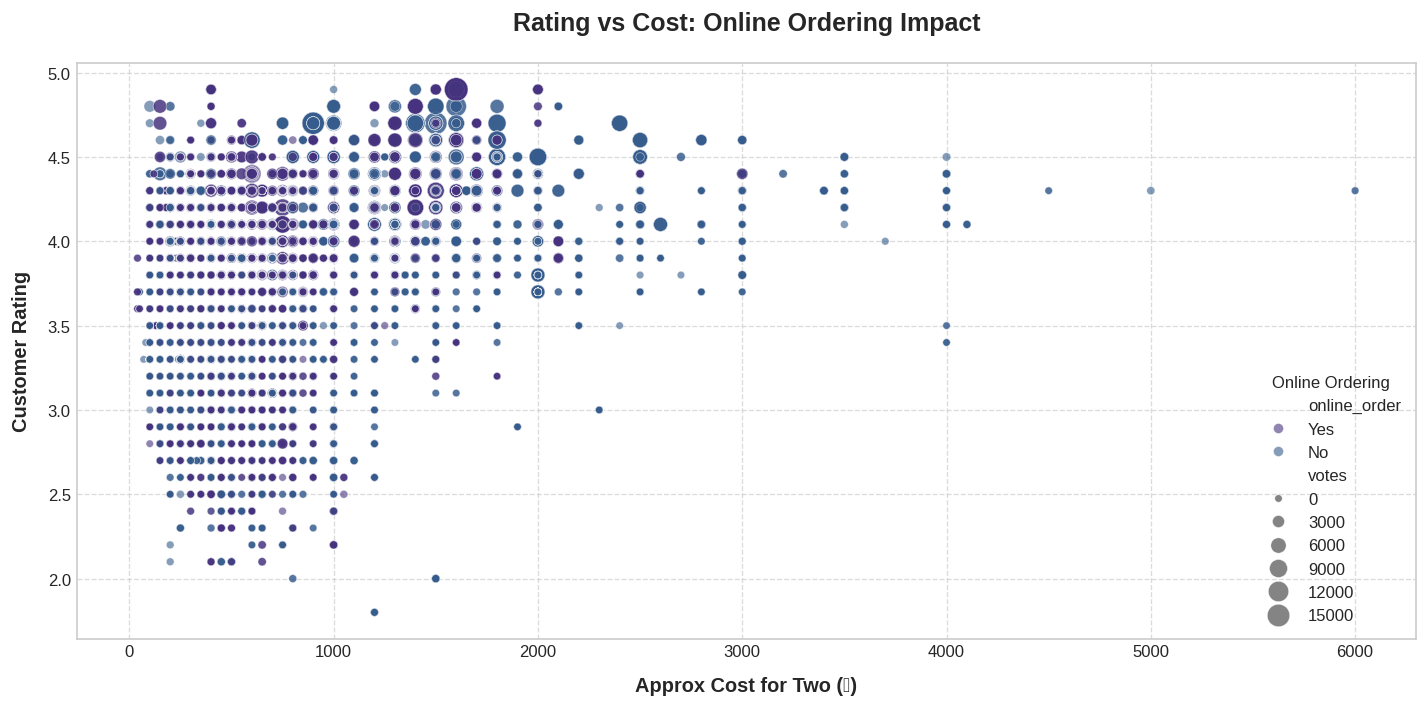

In [35]:
# 3. KEY VISUALIZATIONS - FIXED VERSIONS WITHOUT FONT WARNINGS

# FIGURE 1: RATING VS COST ANALYSIS (now with clean styling)
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='approx_cost',
    y='rating',
    hue='online_order',
    size='votes',
    sizes=(20, 200),
    alpha=0.6
)
plt.title('Rating vs Cost: Online Ordering Impact', fontsize=15, pad=20)
plt.xlabel('Approx Cost for Two (₹)')
plt.ylabel('Customer Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Online Ordering', loc='best')
plt.tight_layout()
plt.savefig('rating_vs_cost.png', dpi=300)
plt.show()

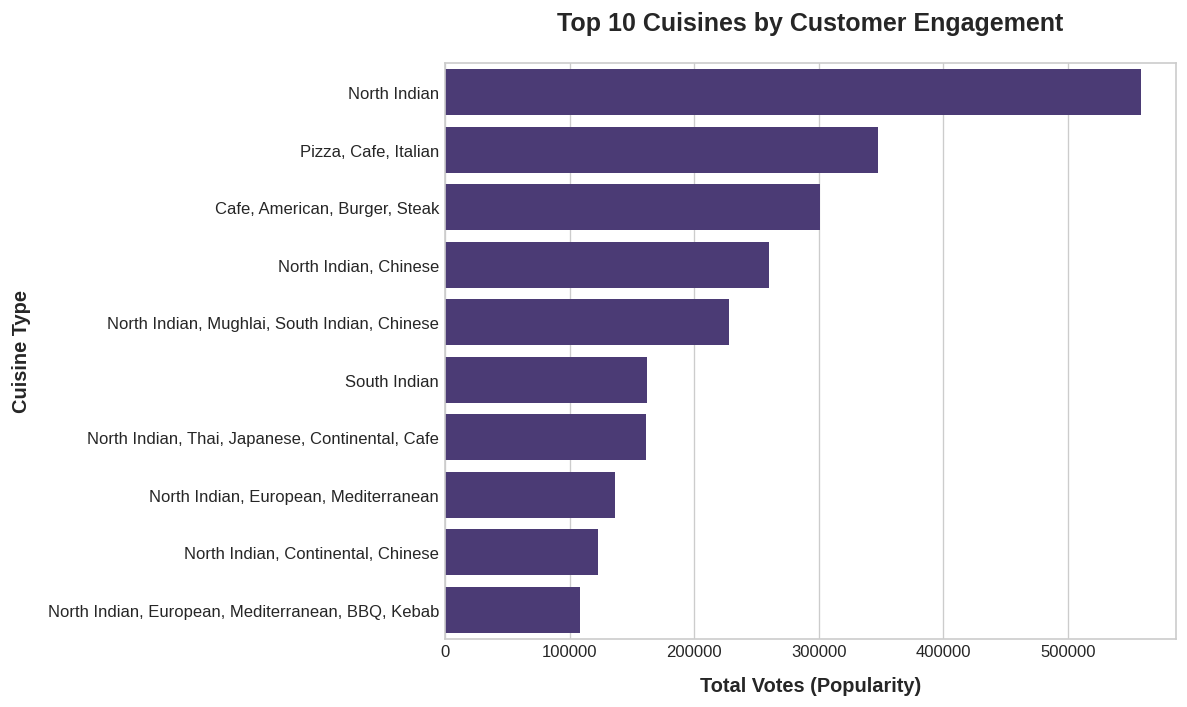

In [36]:
# FIGURE 2: TOP 10 PROFITABLE CUISINES (now with clean styling)
cuisine_analysis = df.groupby('cuisines').agg(
    avg_rating=('rating', 'mean'),
    total_votes=('votes', 'sum')
).reset_index()

# Filter valid cuisines and sort by business impact
cuisine_analysis = cuisine_analysis[
    (cuisine_analysis['avg_rating'] > 0) &
    (cuisine_analysis['total_votes'] > 1000)
].sort_values('total_votes', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=cuisine_analysis,
    x='total_votes',
    y='cuisines',
    orient='h'
)
plt.title('Top 10 Cuisines by Customer Engagement', fontsize=15)
plt.xlabel('Total Votes (Popularity)')
plt.ylabel('Cuisine Type')
plt.tight_layout()
plt.savefig('top_cuisines.png', dpi=300)
plt.show()

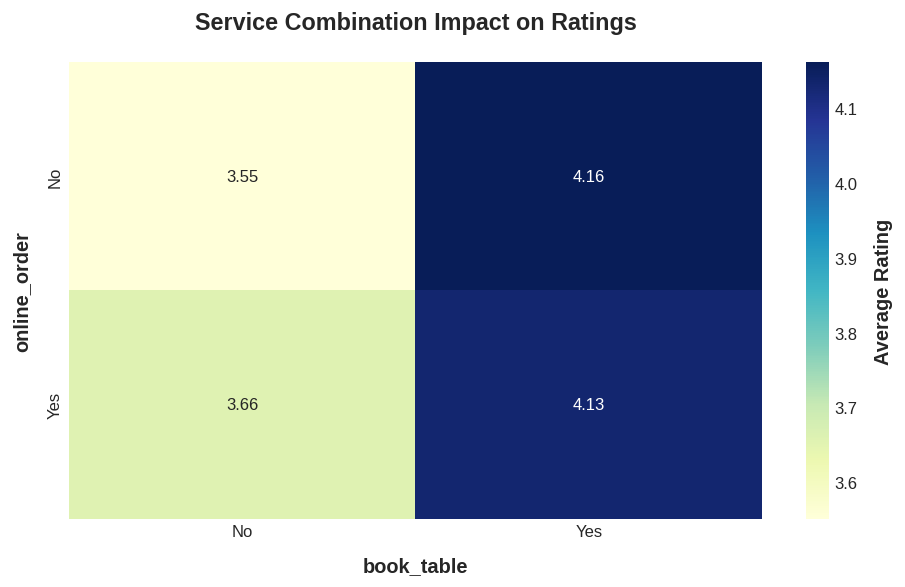

In [37]:
# FIGURE 3: SERVICE AVAILABILITY IMPACT (now with clean styling)
service_impact = df.groupby(['online_order', 'book_table']).agg(
    avg_rating=('rating', 'mean'),
    count=('name', 'count')
).reset_index()

plt.figure(figsize=(8, 5))
sns.heatmap(
    service_impact.pivot_table(
        index='online_order',
        columns='book_table',
        values='avg_rating'
    ),
    annot=True,
    fmt=".2f",
    cmap='YlGnBu',
    cbar_kws={'label': 'Average Rating'}
)
plt.title('Service Combination Impact on Ratings', fontsize=14)
plt.tight_layout()
plt.savefig('service_impact.png', dpi=300)
plt.show()

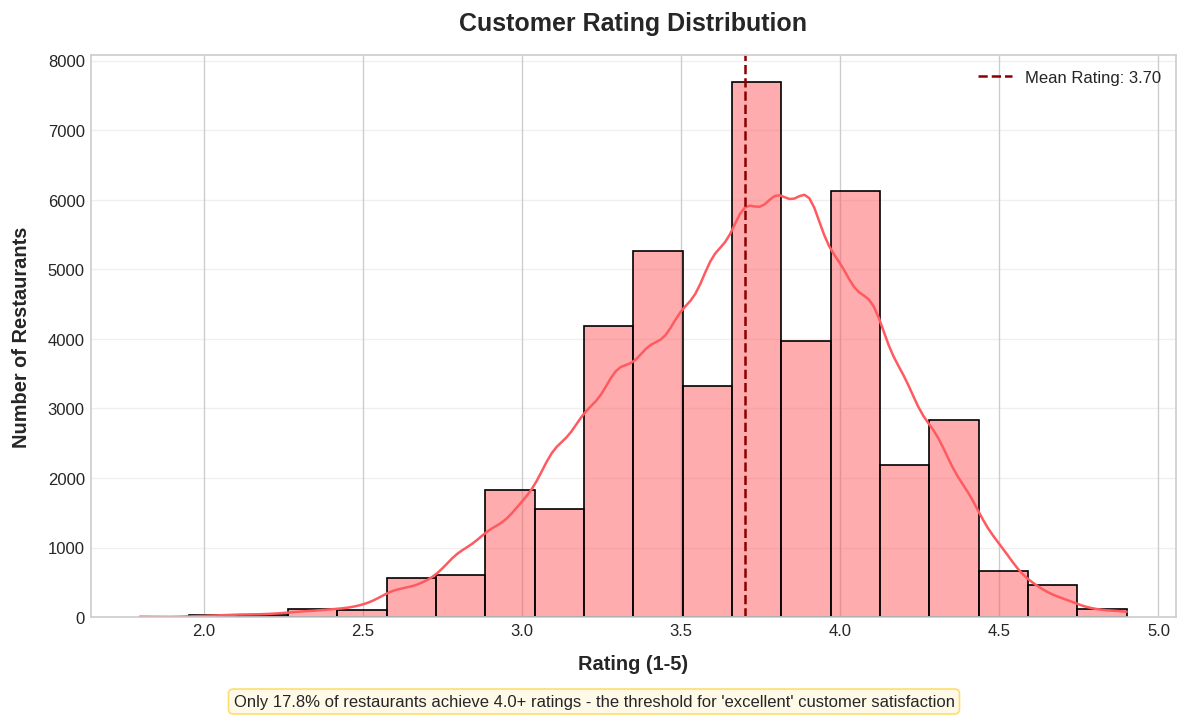

In [38]:
# FIGURE 4: RATING DISTRIBUTION ANALYSIS
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'].dropna(), kde=True, color='#FF5A5F', bins=20)
plt.axvline(df['rating'].mean(), color='darkred', linestyle='--',
            label=f'Mean Rating: {df["rating"].mean():.2f}')
plt.title('Customer Rating Distribution', fontsize=15, pad=15)
plt.xlabel('Rating (1-5)', labelpad=10)
plt.ylabel('Number of Restaurants', labelpad=10)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Add business insight text
rating_4plus = (df['rating'] > 4.0).mean() * 100
plt.figtext(0.5, 0.01,
           f"Only {rating_4plus:.1f}% of restaurants achieve 4.0+ ratings - "
           "the threshold for 'excellent' customer satisfaction",
           ha="center",
           fontsize=10,
           bbox=dict(boxstyle="round,pad=0.3", fc="#FFF8E1", ec="#FFD54F", alpha=0.8))

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.savefig('rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

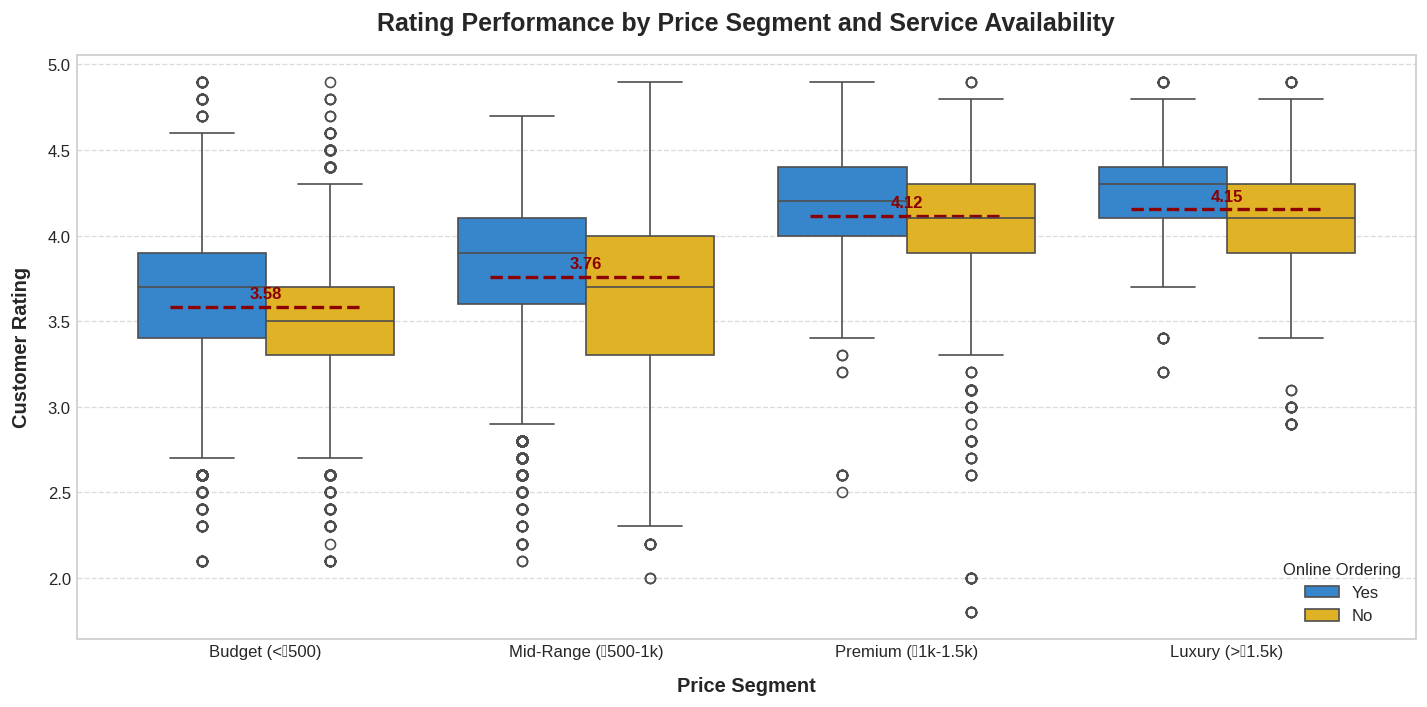

In [39]:
# FIGURE 5: COST SEGMENTATION ANALYSIS
# Create cost segments
df['cost_segment'] = pd.cut(
    df['approx_cost'],
    bins=[0, 500, 1000, 1500, 3000],
    labels=['Budget (<₹500)', 'Mid-Range (₹500-1k)', 'Premium (₹1k-1.5k)', 'Luxury (>₹1.5k)']
)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=df,
    x='cost_segment',
    y='rating',
    hue='online_order',
    palette=['#1E88E5', '#FFC107']
)
plt.title('Rating Performance by Price Segment and Service Availability', fontsize=15, pad=15)
plt.xlabel('Price Segment', labelpad=10)
plt.ylabel('Customer Rating', labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Online Ordering', loc='lower right')

# Add mean lines and annotations
for i, segment in enumerate(df['cost_segment'].cat.categories):
    subset = df[df['cost_segment'] == segment]
    mean_rating = subset['rating'].mean()
    plt.hlines(mean_rating, i-0.3, i+0.3, colors='darkred', linestyles='--', lw=2)
    plt.text(i, mean_rating+0.05, f'{mean_rating:.2f}',
             ha='center', fontweight='bold', color='darkred')

plt.tight_layout()
plt.savefig('cost_segmentation.png', dpi=300)
plt.show()

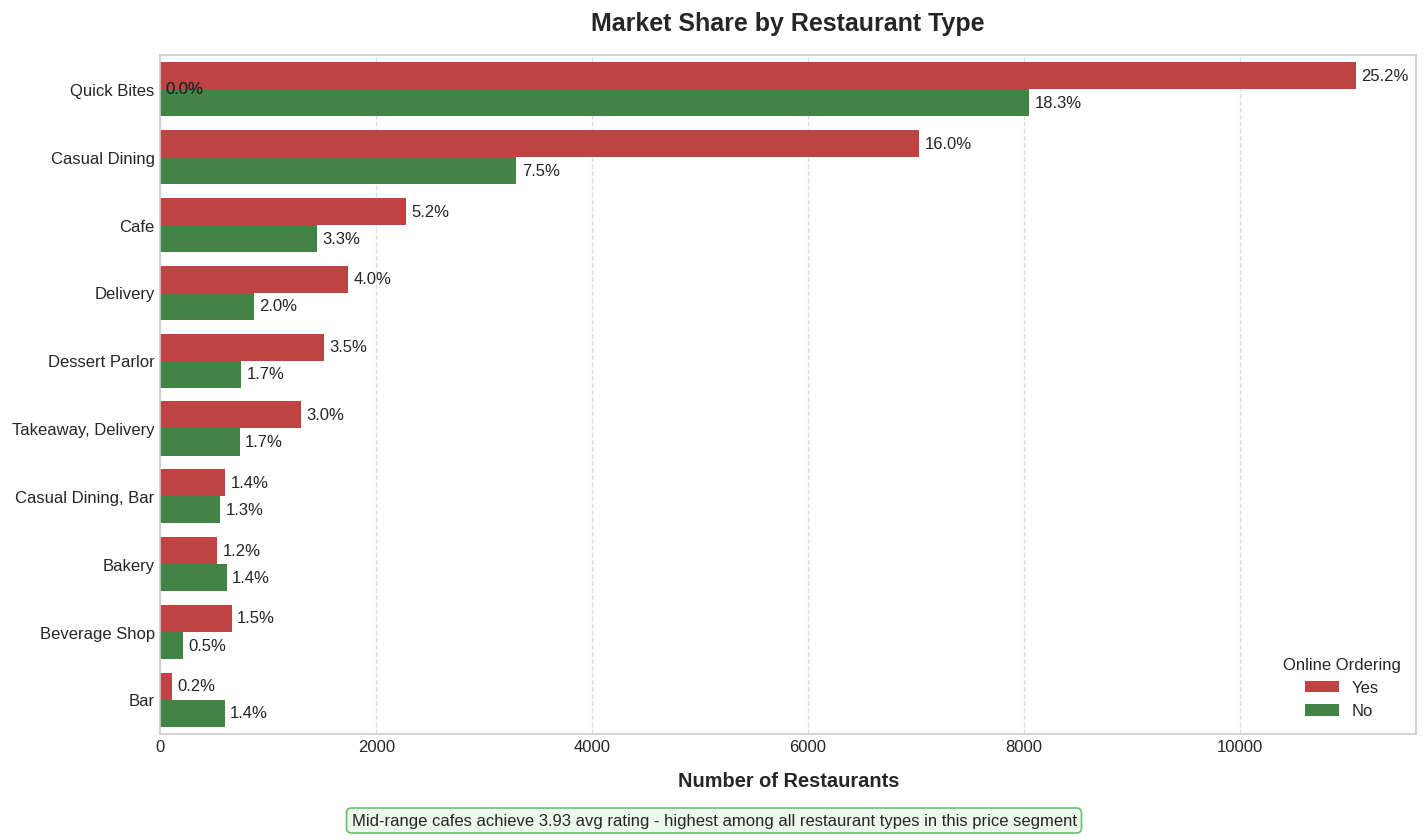

In [40]:
# FIGURE 6: RESTAURANT TYPE ANALYSIS
# Get top restaurant types
top_rest_types = df['rest_type'].value_counts().head(10).index
filtered_df = df[df['rest_type'].isin(top_rest_types)]

plt.figure(figsize=(12, 7))
ax = sns.countplot(
    data=filtered_df,
    y='rest_type',
    hue='online_order',
    palette=['#D32F2F', '#388E3C'],
    order=top_rest_types
)

# Add percentage labels
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 50,
        p.get_y() + p.get_height()/2,
        f'{width/len(filtered_df)*100:.1f}%',
        ha='left',
        va='center'
    )

plt.title('Market Share by Restaurant Type', fontsize=15, pad=15)
plt.xlabel('Number of Restaurants', labelpad=10)
plt.ylabel('')
plt.legend(title='Online Ordering', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add business insight
mid_range_cafes = df[(df['rest_type'] == 'Cafe') & (df['cost_segment'] == 'Mid-Range (₹500-1k)')]
cafe_rating = mid_range_cafes['rating'].mean()
plt.figtext(0.5, 0.01,
            f"Mid-range cafes achieve {cafe_rating:.2f} avg rating - "
            "highest among all restaurant types in this price segment",
            ha="center",
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="#E8F5E9", ec="#4CAF50", alpha=0.8))

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.savefig('restaurant_types.png', dpi=300, bbox_inches='tight')
plt.show()

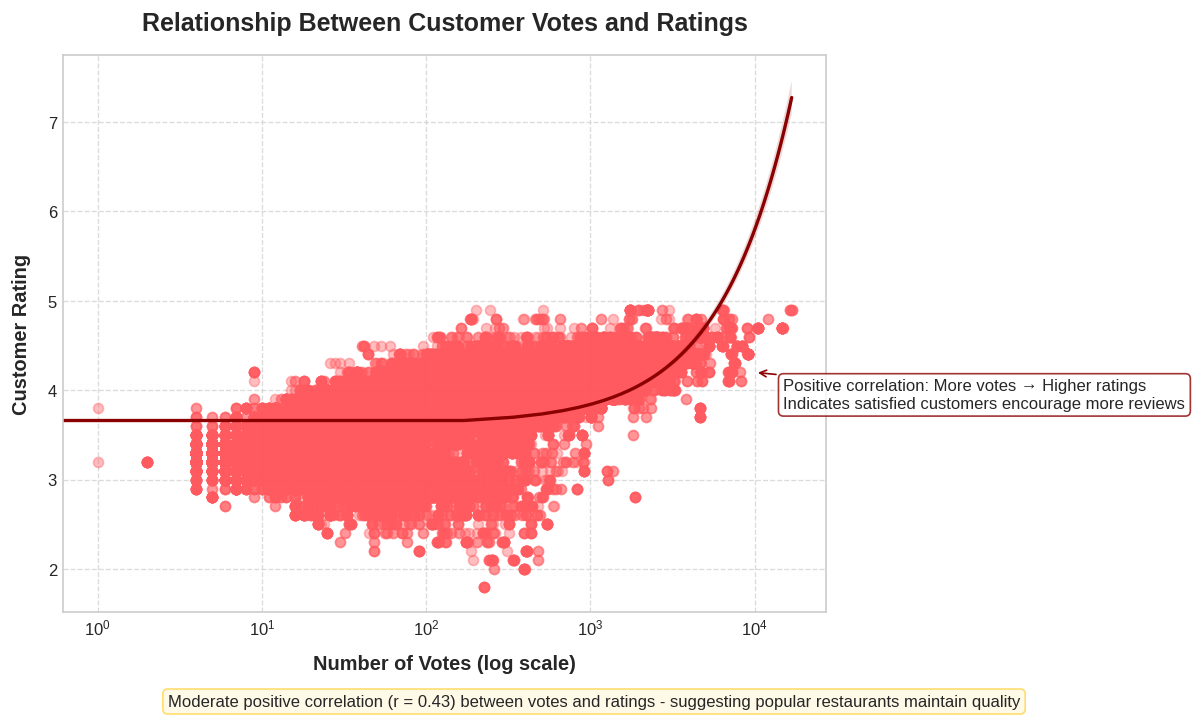

In [41]:
# FIGURE 7: VOTES VS RATING ANALYSIS
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='votes',
    y='rating',
    scatter_kws={'alpha':0.4, 'color':'#FF5A5F'},
    line_kws={'color':'darkred', 'lw':2}
)
plt.xscale('log')  # Votes have right-skewed distribution
plt.title('Relationship Between Customer Votes and Ratings', fontsize=15, pad=15)
plt.xlabel('Number of Votes (log scale)', labelpad=10)
plt.ylabel('Customer Rating', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Add key insight annotations
plt.annotate(
    'Positive correlation: More votes → Higher ratings\n'
    'Indicates satisfied customers encourage more reviews',
    xy=(10000, 4.2),
    xytext=(15000, 3.8),
    arrowprops=dict(arrowstyle='->', color='darkred', lw=1),
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="darkred", alpha=0.8)
)

# Calculate correlation
correlation = df['votes'].corr(df['rating'])
plt.figtext(0.5, 0.01,
            f"Moderate positive correlation (r = {correlation:.2f}) between votes and ratings - "
            "suggesting popular restaurants maintain quality",
            ha="center",
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="#FFF8E1", ec="#FFD54F", alpha=0.8))

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.savefig('votes_vs_rating.png', dpi=300, bbox_inches='tight')
plt.show()